<a href="https://colab.research.google.com/github/bravoeight98/FFN_498R/blob/main/498r_7k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imporing Packages and Libraries

Importing all necessary packages

In [1]:
#import package

!pip install ipython-autotime
%load_ext autotime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
time: 1.48 s (started: 2022-01-02 06:06:52 +00:00)


# Getting and preparing Datasets

Mount from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 29.1 s (started: 2022-01-02 06:06:57 +00:00)


In [3]:
# Reading from file 
fake = pd.read_csv('/content/drive/MyDrive/BanFakeNewsDataset/Fake-1K.csv')
true = pd.read_csv('/content/drive/MyDrive/BanFakeNewsDataset/LabeledAuthentic-7K.csv')

time: 2.86 s (started: 2022-01-02 06:07:33 +00:00)


Show Info

In [4]:
print(true.shape)
print(true.info())
true.head()

(7202, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7202 entries, 0 to 7201
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   articleID  7202 non-null   int64  
 1   domain     7202 non-null   object 
 2   date       7202 non-null   object 
 3   category   7202 non-null   object 
 4   source     7202 non-null   object 
 5   relation   7202 non-null   object 
 6   headline   7202 non-null   object 
 7   content    7202 non-null   object 
 8   label      7202 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 506.5+ KB
None


,articleID,domain,date,category,source,relation,headline,content,label
0,1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0
1,2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0
2,3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0
3,4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0
4,5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0


time: 58.6 ms (started: 2022-01-02 06:09:18 +00:00)


# Preprocessing Data

In [5]:
fake['Label'] = 1
true['Label'] = 0

time: 5.26 ms (started: 2022-01-02 06:09:26 +00:00)


In [6]:
data = pd.concat([true,fake],axis=0,ignore_index=True)
print(data.shape)
data.head()

(8501, 10)


,articleID,domain,date,category,source,relation,headline,content,label,Label
0,1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,0
1,2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,0
2,3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,0
3,4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,0
4,5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0,0


time: 46.4 ms (started: 2022-01-02 06:09:30 +00:00)


In [9]:
data.describe()

,articleID,label,Label
count,8501.000000,8501.000000,8501.000000
mean,3443.091283,0.847194,0.152806
std,2499.712953,0.359821,0.359821
min,1.000000,0.000000,0.000000
25%,1074.000000,1.000000,0.000000
50%,3127.000000,1.000000,0.000000
75%,5555.000000,1.000000,0.000000
max,8268.000000,1.000000,1.000000


time: 43.4 ms (started: 2022-01-01 19:40:51 +00:00)


In [7]:
data['content']=data['headline']+data['content']
data=data.drop(['headline'], axis=1)

time: 52.1 ms (started: 2022-01-02 06:09:39 +00:00)


Chek if dataset is Balanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


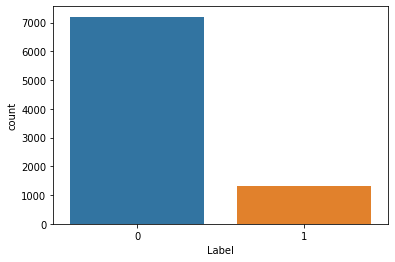

time: 203 ms (started: 2022-01-02 06:11:58 +00:00)


In [8]:
sns.countplot(data.Label)

Conclusion: Imbalanced Dataset

In [9]:
data.category.value_counts()

National         3600
Miscellaneous     944
Sports            943
International     935
Politics          475
Entertainment     408
Editorial         336
Crime             266
Lifestyle         192
Education         139
Finance           138
Technology        125
Name: category, dtype: int64

time: 9.04 ms (started: 2022-01-02 06:12:15 +00:00)


# Data Cleaning

Removing stop words in order to root words that are retaining in the data and fed into the models

In [10]:
#stop = stopwords.words('bangla')
stop = frozenset(["অবশ্য", "অনেক", "অনেকে", "অনেকেই", "অন্তত", "অথবা", "অথচ",
"অর্থাত",
"অন্য",
"আজ",
"আছে",
"আপনার",
"আপনি",
"আবার",
"আমরা",
"আমাকে",
"আমাদের",
"আমার",
"আমি",
"আরও",
"আর",
"আগে",
"আগেই",
"আই",
"অতএব",
"আগামী",
"অবধি",
"অনুযায়ী",
"আদ্যভাগে",
"এই",
"একই",
"একে",
"একটি",
"এখন",
"এখনও",
"এখানে",
"এখানেই",
"এটি",
"এটা",
"এটাই",
"এতটাই",
"এবং",
"একবার",
"এবার",
"এদের",
"এঁদের",
"এমন",
"এমনকী",
"এল",
"এর",
"এরা",
"এঁরা",
"এস",
"এত",
"এতে",
"এসে",
"একে",
"এ",
"ঐ",
"ই",
"ইহা",
"ইত্যাদি",
"উনি",
"উপর",
"উপরে",
"উচিত",
"ও",
"ওই",
"ওর",
"ওরা",
"ওঁর",
"ওঁরা",
"ওকে",
"ওদের",
"ওঁদের"
"ওখানে",
"কত",
"কবে",
"করতে",
"কয়েক",
"কয়েকটি",
"করবে",
"করলেন",
"করার",
"কারও",
"করা",
"করি",
"করিয়ে",
"করার",
"করাই",
"করলে",
"করলেন",
"করিতে",
"করিয়া",
"করেছিলেন",
"করছে",
"করছেন",
"করেছেন",
"করেছে",
"করেন",
"করবেন",
"করায়",
"করে",
"করেই",
"কাছ",
"কাছে",
"কাজে",
"কারণ",
"কিছু",
"কিছুই",
"কিন্তু",
"কিংবা",
"কি",
"কী",
"কেউ",
"কেউই",
"কাউকে",
"কেন",
"কে",
"কোনও",
"কোনো",
"কোন",
"কখনও",
"ক্ষেত্রে",
"খুব",	
"গুলি",
"গিয়ে",
"গিয়েছে",
"গেছে",
"গেল",
"গেলে",
"গোটা",
"চলে",
"ছাড়া",
"ছাড়াও",
"ছিলেন",
"ছিল",
"জন্য",
"জানা",
"ঠিক",
"তিনি",
"তিনঐ",
"তিনিও",
"তখন",
"তবে",
"তবু",
"তাঁদের",
"তাঁহারা",
"তাঁরা",
"তাঁর",
"তাঁকে",
"তাই",
"তেমন",
"তাকে",
"তাহা",
"তাহাতে",
"তাহার",
"তাদের",
"তারপর",
"তারা",
"তারৈ",
"তার",
"তাহলে",
"তিনি",
"তা",
"তাও",
"তাতে",
"তো",
"তত",
"তুমি",
"তোমার",
"তথা",
"থাকে",
"থাকা",
"থাকায়",
"থেকে",
"থেকেও",
"থাকবে",
"থাকেন",
"থাকবেন",
"থেকেই",
"দিকে",
"দিতে",
"দিয়ে",
"দিয়েছে",
"দিয়েছেন",
"দিলেন",
"দু",
"দুটি",
"দুটো",
"দেয়",
"দেওয়া",
"দেওয়ার",
"দেখা",
"দেখে",
"দেখতে",
"দ্বারা",
"ধরে",
"ধরা",
"নয়",
"নানা",
"না",
"নাকি",
"নাগাদ",
"নিতে",
"নিজে",
"নিজেই",
"নিজের",
"নিজেদের",
"নিয়ে",
"নেওয়া",
"নেওয়ার",
"নেই",
"নাই",
"পক্ষে",
"পর্যন্ত",
"পাওয়া",
"পারেন",
"পারি",
"পারে",
"পরে",
"পরেই",
"পরেও",
"পর",
"পেয়ে",
"প্রতি",
"প্রভৃতি",
"প্রায়",
"ফের",
"ফলে",
"ফিরে",
"ব্যবহার",
"বলতে",
"বললেন",
"বলেছেন",
"বলল",
"বলা",
"বলেন",
"বলে",
"বহু",
"বসে",
"বার",
"বা",
"বিনা",
"বরং",
"বদলে",
"বাদে",
"বার",
"বিশেষ",
"বিভিন্ন	বিষয়টি",
"ব্যবহার",
"ব্যাপারে",
"ভাবে",
"ভাবেই",
"মধ্যে",
"মধ্যেই",
"মধ্যেও",
"মধ্যভাগে",
"মাধ্যমে",
"মাত্র",
"মতো",
"মতোই",
"মোটেই",
"যখন",
"যদি",
"যদিও",
"যাবে",
"যায়",
"যাকে",
"যাওয়া",
"যাওয়ার",
"যত",
"যতটা",
"যা",
"যার",
"যারা",
"যাঁর",
"যাঁরা",
"যাদের",
"যান",
"যাচ্ছে",
"যেতে",
"যাতে",
"যেন",
"যেমন",
"যেখানে",
"যিনি",
"যে",
"রেখে",
"রাখা",
"রয়েছে",
"রকম",
"শুধু",
"সঙ্গে",
"সঙ্গেও",
"সমস্ত",
"সব",
"সবার",
"সহ",
"সুতরাং",
"সহিত",
"সেই",
"সেটা",
"সেটি",
"সেটাই",
"সেটাও",
"সম্প্রতি",
"সেখান",
"সেখানে",
"সে",
"স্পষ্ট",
"স্বয়ং",
"হইতে",
"হইবে",
"হৈলে",
"হইয়া",
"হচ্ছে",
"হত",
"হতে",
"হতেই",
"হবে",
"হবেন",
"হয়েছিল",
"হয়েছে",
"হয়েছেন",
"হয়ে",
"হয়নি",
"হয়",
"হয়েই",
"হয়তো",
"হল",
"হলে",
"হলেই",
"হলেও",
"হলো",
"হিসাবে",
"হওয়া",
"হওয়ার",
"হওয়ায়",
"হন",
"হোক",
"জন",
"জনকে",
"জনের",
"জানতে",
"জানায়",
"জানিয়ে",
"জানানো",
"জানিয়েছে",
"জন্য", "জন্যওজে", "জে", "বেশ", "দেন", "তুলে", "ছিলেন", "চান", "চায়", "চেয়ে", "মোট", "যথেষ্ট", "টি"])
data['content'] = data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

time: 1.18 s (started: 2022-01-02 06:12:21 +00:00)


#Bulding Model

Spliting datas into training set and test set

In [11]:
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(data['content'], y,test_size=0.33,random_state=53)

time: 6.17 ms (started: 2022-01-02 06:12:39 +00:00)


In [12]:
count_vectorizer = CountVectorizer(stop_words = frozenset(["অবশ্য", "অনেক", "অনেকে", "অনেকেই", "অন্তত", "অথবা", "অথচ",
"অর্থাত",
"অন্য",
"আজ",
"আছে",
"আপনার",
"আপনি",
"আবার",
"আমরা",
"আমাকে",
"আমাদের",
"আমার",
"আমি",
"আরও",
"আর",
"আগে",
"আগেই",
"আই",
"অতএব",
"আগামী",
"অবধি",
"অনুযায়ী",
"আদ্যভাগে",
"এই",
"একই",
"একে",
"একটি",
"এখন",
"এখনও",
"এখানে",
"এখানেই",
"এটি",
"এটা",
"এটাই",
"এতটাই",
"এবং",
"একবার",
"এবার",
"এদের",
"এঁদের",
"এমন",
"এমনকী",
"এল",
"এর",
"এরা",
"এঁরা",
"এস",
"এত",
"এতে",
"এসে",
"একে",
"এ",
"ঐ",
"ই",
"ইহা",
"ইত্যাদি",
"উনি",
"উপর",
"উপরে",
"উচিত",
"ও",
"ওই",
"ওর",
"ওরা",
"ওঁর",
"ওঁরা",
"ওকে",
"ওদের",
"ওঁদের"
"ওখানে",
"কত",
"কবে",
"করতে",
"কয়েক",
"কয়েকটি",
"করবে",
"করলেন",
"করার",
"কারও",
"করা",
"করি",
"করিয়ে",
"করার",
"করাই",
"করলে",
"করলেন",
"করিতে",
"করিয়া",
"করেছিলেন",
"করছে",
"করছেন",
"করেছেন",
"করেছে",
"করেন",
"করবেন",
"করায়",
"করে",
"করেই",
"কাছ",
"কাছে",
"কাজে",
"কারণ",
"কিছু",
"কিছুই",
"কিন্তু",
"কিংবা",
"কি",
"কী",
"কেউ",
"কেউই",
"কাউকে",
"কেন",
"কে",
"কোনও",
"কোনো",
"কোন",
"কখনও",
"ক্ষেত্রে",
"খুব",	
"গুলি",
"গিয়ে",
"গিয়েছে",
"গেছে",
"গেল",
"গেলে",
"গোটা",
"চলে",
"ছাড়া",
"ছাড়াও",
"ছিলেন",
"ছিল",
"জন্য",
"জানা",
"ঠিক",
"তিনি",
"তিনঐ",
"তিনিও",
"তখন",
"তবে",
"তবু",
"তাঁদের",
"তাঁহারা",
"তাঁরা",
"তাঁর",
"তাঁকে",
"তাই",
"তেমন",
"তাকে",
"তাহা",
"তাহাতে",
"তাহার",
"তাদের",
"তারপর",
"তারা",
"তারৈ",
"তার",
"তাহলে",
"তিনি",
"তা",
"তাও",
"তাতে",
"তো",
"তত",
"তুমি",
"তোমার",
"তথা",
"থাকে",
"থাকা",
"থাকায়",
"থেকে",
"থেকেও",
"থাকবে",
"থাকেন",
"থাকবেন",
"থেকেই",
"দিকে",
"দিতে",
"দিয়ে",
"দিয়েছে",
"দিয়েছেন",
"দিলেন",
"দু",
"দুটি",
"দুটো",
"দেয়",
"দেওয়া",
"দেওয়ার",
"দেখা",
"দেখে",
"দেখতে",
"দ্বারা",
"ধরে",
"ধরা",
"নয়",
"নানা",
"না",
"নাকি",
"নাগাদ",
"নিতে",
"নিজে",
"নিজেই",
"নিজের",
"নিজেদের",
"নিয়ে",
"নেওয়া",
"নেওয়ার",
"নেই",
"নাই",
"পক্ষে",
"পর্যন্ত",
"পাওয়া",
"পারেন",
"পারি",
"পারে",
"পরে",
"পরেই",
"পরেও",
"পর",
"পেয়ে",
"প্রতি",
"প্রভৃতি",
"প্রায়",
"ফের",
"ফলে",
"ফিরে",
"ব্যবহার",
"বলতে",
"বললেন",
"বলেছেন",
"বলল",
"বলা",
"বলেন",
"বলে",
"বহু",
"বসে",
"বার",
"বা",
"বিনা",
"বরং",
"বদলে",
"বাদে",
"বার",
"বিশেষ",
"বিভিন্ন	বিষয়টি",
"ব্যবহার",
"ব্যাপারে",
"ভাবে",
"ভাবেই",
"মধ্যে",
"মধ্যেই",
"মধ্যেও",
"মধ্যভাগে",
"মাধ্যমে",
"মাত্র",
"মতো",
"মতোই",
"মোটেই",
"যখন",
"যদি",
"যদিও",
"যাবে",
"যায়",
"যাকে",
"যাওয়া",
"যাওয়ার",
"যত",
"যতটা",
"যা",
"যার",
"যারা",
"যাঁর",
"যাঁরা",
"যাদের",
"যান",
"যাচ্ছে",
"যেতে",
"যাতে",
"যেন",
"যেমন",
"যেখানে",
"যিনি",
"যে",
"রেখে",
"রাখা",
"রয়েছে",
"রকম",
"শুধু",
"সঙ্গে",
"সঙ্গেও",
"সমস্ত",
"সব",
"সবার",
"সহ",
"সুতরাং",
"সহিত",
"সেই",
"সেটা",
"সেটি",
"সেটাই",
"সেটাও",
"সম্প্রতি",
"সেখান",
"সেখানে",
"সে",
"স্পষ্ট",
"স্বয়ং",
"হইতে",
"হইবে",
"হৈলে",
"হইয়া",
"হচ্ছে",
"হত",
"হতে",
"হতেই",
"হবে",
"হবেন",
"হয়েছিল",
"হয়েছে",
"হয়েছেন",
"হয়ে",
"হয়নি",
"হয়",
"হয়েই",
"হয়তো",
"হল",
"হলে",
"হলেই",
"হলেও",
"হলো",
"হিসাবে",
"হওয়া",
"হওয়ার",
"হওয়ায়",
"হন",
"হোক",
"জন",
"জনকে",
"জনের",
"জানতে",
"জানায়",
"জানিয়ে",
"জানানো",
"জানিয়েছে",
"জন্য", "জন্যওজে", "জে", "বেশ", "দেন", "তুলে", "ছিলেন", "চান", "চায়", "চেয়ে", "মোট", "যথেষ্ট", "টি"]))

count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
print(count_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['অথব', 'অন', 'অবধ', 'অবশ', 'অর', 'আগ', 'আছ', 'আদ', 'আপন', 'আব', 'আম', 'আমর', 'ইত', 'ইহ', 'উই', 'উক', 'উচ', 'উন', 'এক', 'একট', 'একব', 'এখ', 'এট', 'এতট', 'এদ', 'এব', 'এমনক', 'ওক', 'ওদ', 'ওয়', 'কট', 'কব', 'কর', 'করছ', 'করত', 'করব', 'করল', 'কয়', 'খত', 'চল', 'জনক', 'তথ', 'তব', 'তর', 'ধর', 'নঐ', 'নও', 'নত', 'পক', 'পষ', 'ফল', 'বদল', 'বর', 'বল', 'বলত', 'বস', 'বহ', 'বয়', 'মত', 'মধ', 'মন', 'যওজ', 'যতট', 'যথ', 'যদ', 'যন', 'যবহ', 'যভ', 'যম', 'রও', 'রওখ', 'রণ', 'রত', 'রপর', 'রভ', 'রয়', 'ষয়ট', 'সঙ', 'সম', 'সমস', 'হইত', 'হইব', 'হইয়', 'হওয়', 'হচ', 'হব', 'হয়ত', 'হয়ন'] not in stop_words.
  % sorted(inconsistent)


(5695, 11928)
time: 2.4 s (started: 2022-01-02 06:12:42 +00:00)


#Trainig Model

##RNN

In [66]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

time: 7.74 ms (started: 2022-01-02 08:31:45 +00:00)


In [67]:
max_vocab = 10000

time: 1.28 ms (started: 2022-01-02 08:31:46 +00:00)


In [68]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

time: 72.6 ms (started: 2022-01-02 08:31:46 +00:00)


In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        49664     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [70]:
from sklearn.metrics import classification_report

time: 1.36 ms (started: 2022-01-02 08:31:47 +00:00)


In [71]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

print(classification_report(y_test, binary_predictions, target_names = ['Fake','True']))

Epoch 1/10
171/171 [==============================] - 123s 670ms/step - loss: 0.5243 - accuracy: 0.8484 - val_loss: 0.4095 - val_accuracy: 0.8509
Epoch 2/10
171/171 [==============================] - 79s 463ms/step - loss: 0.2950 - accuracy: 0.8484 - val_loss: 0.2233 - val_accuracy: 0.8509
Epoch 3/10
171/171 [==============================] - 80s 466ms/step - loss: 0.1823 - accuracy: 0.8500 - val_loss: 0.2084 - val_accuracy: 0.8509
Epoch 4/10
171/171 [==============================] - 79s 463ms/step - loss: 0.1362 - accuracy: 0.9426 - val_loss: 0.1570 - val_accuracy: 0.9491
Epoch 5/10
171/171 [==============================] - 83s 483ms/step - loss: 0.0891 - accuracy: 0.9809 - val_loss: 0.1488 - val_accuracy: 0.9561
Epoch 6/10
171/171 [==============================] - 85s 497ms/step - loss: 0.0625 - accuracy: 0.9877 - val_loss: 0.1911 - val_accuracy: 0.9491
Epoch 7/10
171/171 [==============================] - 84s 492ms/step - loss: 0.0541 - accuracy: 0.9912 - val_loss: 0.1927 - val_a

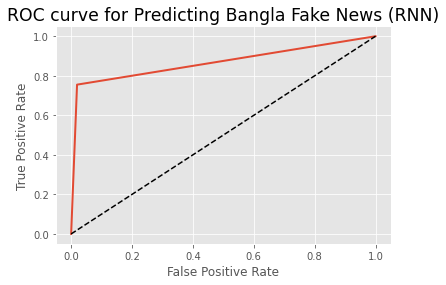

time: 209 ms (started: 2022-01-02 08:42:27 +00:00)


In [72]:
# plot ROC Curve

from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, binary_predictions)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (RNN)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [73]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, binary_predictions)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8679
time: 8.51 ms (started: 2022-01-02 08:42:28 +00:00)


In [74]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, binary_predictions)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2323   46]
 [ 107  330]]

True Positives(TP) =  2323

True Negatives(TN) =  330

False Positives(FP) =  46

False Negatives(FN) =  107
time: 19.8 ms (started: 2022-01-02 08:42:28 +00:00)


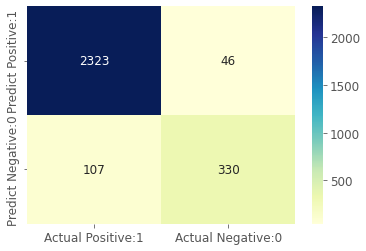

time: 254 ms (started: 2022-01-02 08:42:28 +00:00)


In [75]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier=MultinomialNB()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)

print(classification_report(y_test, pred, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.89      0.24      0.38      2369
        True       0.17      0.84      0.28       437

    accuracy                           0.34      2806
   macro avg       0.53      0.54      0.33      2806
weighted avg       0.78      0.34      0.37      2806

time: 55 ms (started: 2022-01-02 08:42:28 +00:00)


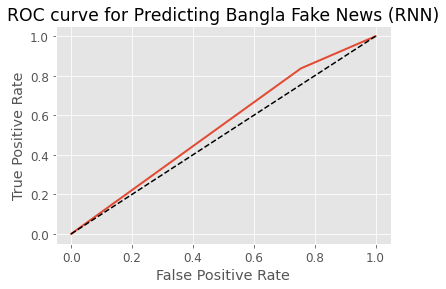

time: 238 ms (started: 2022-01-02 08:42:28 +00:00)


In [77]:
# plot ROC Curve

from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (RNN)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [78]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 580 1789]
 [  71  366]]

True Positives(TP) =  580

True Negatives(TN) =  366

False Positives(FP) =  1789

False Negatives(FN) =  71
time: 19.6 ms (started: 2022-01-02 08:42:28 +00:00)


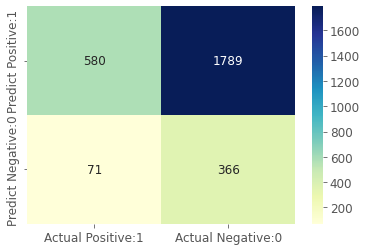

time: 323 ms (started: 2022-01-02 08:42:28 +00:00)


In [79]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##SVM (Linear)

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

time: 1.58 ms (started: 2022-01-02 08:42:29 +00:00)


In [81]:

svc_model1 = SVC(C=1, kernel='linear', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction1 = svc_model1.predict(count_test)

print(classification_report(y_test, prediction1, target_names = ['Fake','True']))


              precision    recall  f1-score   support

        Fake       0.95      0.97      0.96      2369
        True       0.81      0.73      0.77       437

    accuracy                           0.93      2806
   macro avg       0.88      0.85      0.86      2806
weighted avg       0.93      0.93      0.93      2806

time: 8.37 s (started: 2022-01-02 08:42:29 +00:00)


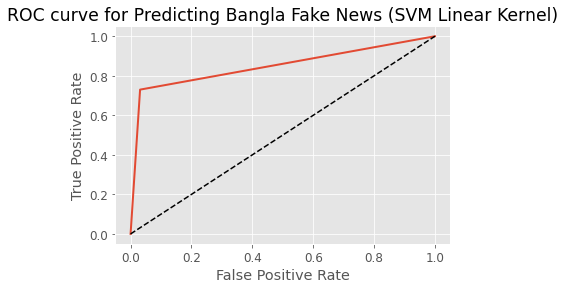

time: 283 ms (started: 2022-01-02 08:42:37 +00:00)


In [82]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (SVM Linear Kernel)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [83]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, prediction1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8494
time: 26.9 ms (started: 2022-01-02 08:42:37 +00:00)


In [84]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2295   74]
 [ 118  319]]

True Positives(TP) =  2295

True Negatives(TN) =  319

False Positives(FP) =  74

False Negatives(FN) =  118
time: 14.8 ms (started: 2022-01-02 08:42:37 +00:00)


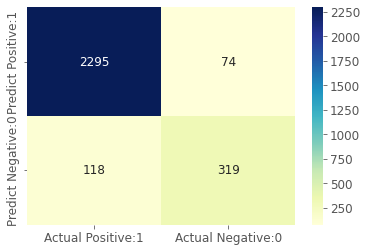

time: 324 ms (started: 2022-01-02 08:42:37 +00:00)


In [85]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##SVM (Polynomial)

In [86]:
svc_model1 = SVC(C=1, kernel='poly', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction2 = svc_model1.predict(count_test)

print(classification_report(y_test, prediction2, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.93      0.94      0.94      2369
        True       0.67      0.60      0.63       437

    accuracy                           0.89      2806
   macro avg       0.80      0.77      0.78      2806
weighted avg       0.89      0.89      0.89      2806

time: 13.9 s (started: 2022-01-02 08:42:38 +00:00)


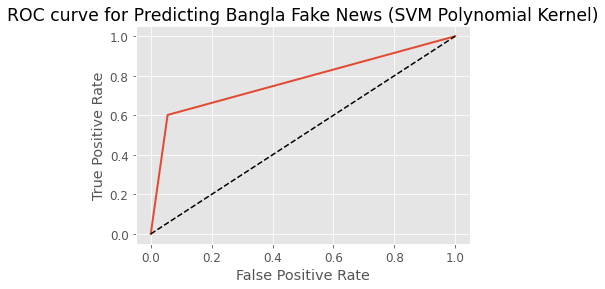

time: 211 ms (started: 2022-01-02 08:42:52 +00:00)


In [87]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction2)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (SVM Polynomial Kernel)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [88]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, prediction2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7733
time: 12.5 ms (started: 2022-01-02 08:42:52 +00:00)


In [89]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction2)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2238  131]
 [ 174  263]]

True Positives(TP) =  2238

True Negatives(TN) =  263

False Positives(FP) =  131

False Negatives(FN) =  174
time: 11.8 ms (started: 2022-01-02 08:42:52 +00:00)


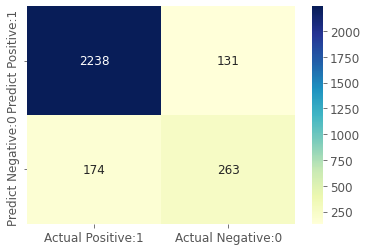

time: 289 ms (started: 2022-01-02 08:42:52 +00:00)


In [90]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##SVM (RBF)

In [91]:
svc_model1 = SVC(C=1, kernel='rbf', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction3 = svc_model1.predict(count_test)

print(classification_report(y_test, prediction3, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.85      1.00      0.92      2369
        True       1.00      0.03      0.06       437

    accuracy                           0.85      2806
   macro avg       0.92      0.52      0.49      2806
weighted avg       0.87      0.85      0.78      2806

time: 38.9 s (started: 2022-01-02 08:42:52 +00:00)


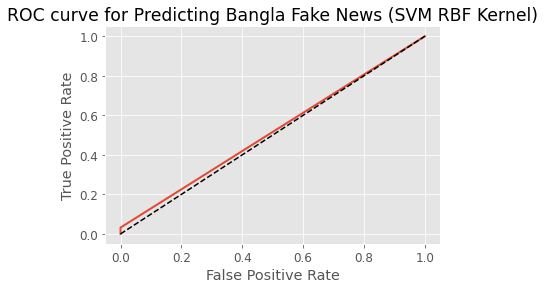

time: 219 ms (started: 2022-01-02 08:43:31 +00:00)


In [92]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction3)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (SVM RBF Kernel)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [93]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, prediction3)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5160
time: 7.55 ms (started: 2022-01-02 08:43:31 +00:00)


In [94]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction3)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2369    0]
 [ 423   14]]

True Positives(TP) =  2369

True Negatives(TN) =  14

False Positives(FP) =  0

False Negatives(FN) =  423
time: 15.9 ms (started: 2022-01-02 08:43:31 +00:00)


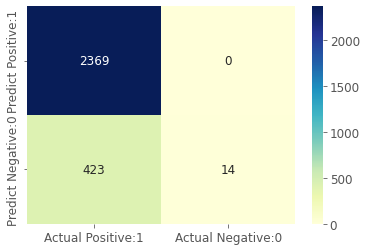

time: 272 ms (started: 2022-01-02 08:43:31 +00:00)


In [95]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##SVM (Sigmoid)

In [96]:
svc_model1 = SVC(C=1, kernel='sigmoid', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction4 = svc_model1.predict(count_test)

print(classification_report(y_test, prediction4, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.85      0.87      0.86      2369
        True       0.22      0.20      0.21       437

    accuracy                           0.76      2806
   macro avg       0.54      0.53      0.53      2806
weighted avg       0.76      0.76      0.76      2806

time: 8.44 s (started: 2022-01-02 08:43:32 +00:00)


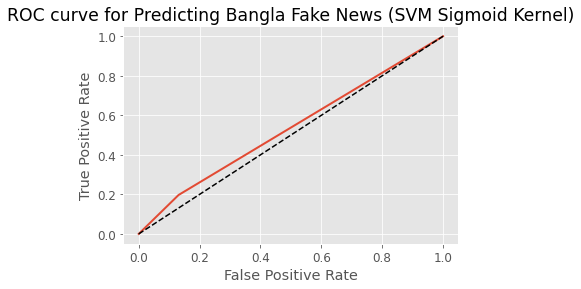

time: 218 ms (started: 2022-01-02 08:43:40 +00:00)


In [97]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prediction4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (SVM Sigmoid Kernel)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [98]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, prediction4)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5330
time: 15.7 ms (started: 2022-01-02 08:43:40 +00:00)


In [99]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction4)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2059  310]
 [ 351   86]]

True Positives(TP) =  2059

True Negatives(TN) =  86

False Positives(FP) =  310

False Negatives(FN) =  351
time: 13.9 ms (started: 2022-01-02 08:43:40 +00:00)


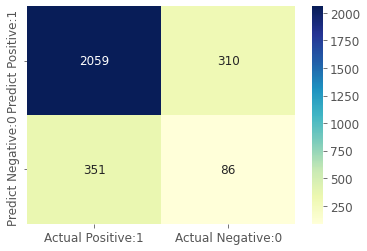

time: 308 ms (started: 2022-01-02 08:43:40 +00:00)


In [100]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##LSTM

In [101]:
# importing neural network libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GRU, LSTM, RNN, SpatialDropout1D

time: 7.58 ms (started: 2022-01-02 08:43:41 +00:00)


In [102]:
max_features = 100000

time: 1.22 ms (started: 2022-01-02 08:43:41 +00:00)


In [103]:
# LSTM Neural Network
lstm_model = Sequential(name = 'lstm_nn_model')
lstm_model.add(layer = Embedding(input_dim = max_features, output_dim = 120, name = '1st_layer'))
lstm_model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
lstm_model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm_model.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))
# compiling the model
lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

time: 335 ms (started: 2022-01-02 08:43:41 +00:00)


In [104]:
lstm_model_fit = lstm_model.fit(X_train, y_train, epochs = 1)

178/178 [==============================] - 183s 1s/step - loss: 0.4461 - accuracy: 0.8469
time: 3min 3s (started: 2022-01-02 08:43:41 +00:00)


In [105]:
#pred = lstm_model.predict(X_test)
#pred = np.round(pred).astype(int)
predict_x=lstm_model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
binary_predictions = []

for i in classes_x:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

print(classification_report(y_test, binary_predictions, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.84      1.00      0.92      2369
        True       0.00      0.00      0.00       437

    accuracy                           0.84      2806
   macro avg       0.42      0.50      0.46      2806
weighted avg       0.71      0.84      0.77      2806

time: 8.15 s (started: 2022-01-02 08:46:44 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


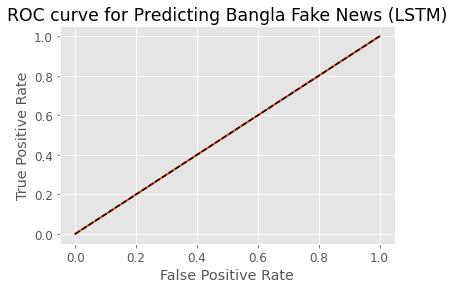

time: 207 ms (started: 2022-01-02 08:46:52 +00:00)


In [106]:
# plot ROC Curve

from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, classes_x)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting Bangla Fake News (LSTM)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [107]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, classes_x)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2369    0]
 [ 437    0]]

True Positives(TP) =  2369

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  437
time: 8.49 ms (started: 2022-01-02 08:46:53 +00:00)


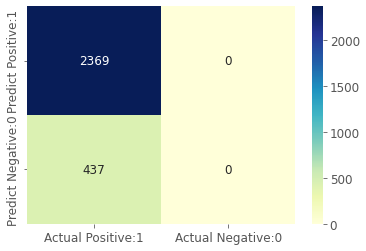

time: 1.08 s (started: 2022-01-02 08:46:53 +00:00)


In [108]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')